<a href="https://colab.research.google.com/github/joembolinas/My-Jupyter-Notebook/blob/master/FinMark_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Project Finer FinMark: Initial Assessment & Project Outline

Notebook Purpose:
1.  Provide an overview of the Project Finer FinMark initiative.
2.  Load and perform an initial analysis of the current state assessment data (CSV files).
3.  Visualize key findings from the data.
4.  Outline a high-level project walkthrough.

Author: [Joem bolinas]
Date: [=today]

Note: This notebook represents an individual's initial assessment based on provided data.
"""



# Project Finer FinMark: Overview

**Company:** FinMark Corporation - Data-driven financial/marketing analytics & BI for SMEs in Southeast Asia.

**Situation:** Rapid growth has overwhelmed existing systems (originally designed for small scale). Current capacity is ~500 orders/day, projected need is 3000/day. This causes system crashes and customer complaints.

**Goal:** Enhance FinMark's services by developing a **scalable, secure, and data-driven platform** to support its growing SME client base and future expansion (target: double customers by year-end).

**Your Role:** Consultant team (Software Devs, Network/Cybersec, Data Analysts) hired by the CTO.

**Major Challenges:**

1.  **Scalable App (Internal Client: COO Michael Cruz):** Launch a high-performance SaaS platform/app (web/mobile/desktop) capable of handling rapid user growth and high concurrency.
    *   *Immediate Pain Point:* Critical operations dashboard takes 20s+ to load for 200 employees.
2.  **Secure, Resilient Network (Internal Client: CEO Antonio Reyes):** Build a robust network infrastructure resistant to cyber threats, ensuring high availability and protecting sensitive financial/marketing data.
    *   *Immediate Pain Point:* Unauthorized access incidents reported; system slowdowns during peak hours increase vulnerability.
3.  **Harnessing Big Data (Internal Client: CMO Jennifer Lee):** Implement capabilities to provide real-time insights, predict market trends using AI, and enable data-driven marketing strategies.
    *   *Immediate Pain Point:* Lack of real-time data visibility; marketing decisions delayed or based on outdated reports; inability to anticipate market shifts.

**Interdependency:** Solutions for each challenge must integrate seamlessly to create a cohesive, functional platform.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Mount Google Drive
try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")

# --- IMPORTANT: MODIFY THIS PATH ---
# Set the base path to the folder containing your CSV files in Google Drive
drive_base_path = '/content/drive/MyDrive/Colab Notebooks/ProjectFinerFinMark_Data/' # <-- CHANGE THIS TO YOUR FOLDER PATH

# --- Check if path exists ---
if not os.path.exists(drive_base_path):
    print(f"ERROR: The specified path does not exist: {drive_base_path}")
    print("Please upload your CSV files to Google Drive and update the 'drive_base_path' variable.")
else:
    print(f"Base path set to: {drive_base_path}")
    # List files to confirm (optional)
    # print("Files in directory:", os.listdir(drive_base_path))

# Set plot style
sns.set_theme(style="whitegrid")

Mounted at /content/drive
Google Drive mounted successfully.
Base path set to: /content/drive/MyDrive/Colab Notebooks/ProjectFinerFinMark_Data/


In [ ]:

# --- Define file paths ---
file_paths = {
    "app_spec": os.path.join(drive_base_path, 'app_modules_spec.csv'),
    "marketing": os.path.join(drive_base_path, 'marketing_summary.csv'),
    "trends": os.path.join(drive_base_path, 'trend_report.csv'),
    "events": os.path.join(drive_base_path, 'event_logs.csv'),
    "network_inv": os.path.join(drive_base_path, 'network_inventory.csv'),
    "traffic": os.path.join(drive_base_path, 'traffic_logs.csv')
}

# --- Load data into Pandas DataFrames ---
dataframes = {}
loaded_successfully = True

for name, path in file_paths.items():
    try:
        dataframes[name] = pd.read_csv(path)
        print(f"Successfully loaded: {os.path.basename(path)}")
        # Display first few rows to verify
        print(dataframes[name].head())
        print("-" * 30)
    except FileNotFoundError:
        print(f"ERROR: File not found at {path}. Please check the path and filename.")
        loaded_successfully = False
    except Exception as e:
        print(f"ERROR: Could not load {os.path.basename(path)}. Error: {e}")
        loaded_successfully = False

if not loaded_successfully:
    print("\nOne or more files failed to load. Please check paths and file integrity.")
else:
    print("\nAll specified CSV files loaded successfully (if found).")

# Assign dataframes to variables for easier access (optional)
if loaded_successfully:
    df_app_spec = dataframes.get("app_spec")
    df_marketing = dataframes.get("marketing")
    df_trends = dataframes.get("trends")
    df_events = dataframes.get("events")
    df_network_inv = dataframes.get("network_inv")
    df_traffic = dataframes.get("traffic")

Successfully loaded: app_modules_spec.csv
      Module Name                     Feature Summary Supported APIs  \
0        UserAuth          Basic login/logout, no 2FA  Internal only   
1  ProductCatalog          Product listing and search            NaN   
2   Cart/Checkout  Add/remove, purchase, confirmation  Internal only   
3   OrderTracking    Track status, estimated delivery            NaN   
4        Feedback            Submit and view feedback            NaN   

             Known Issues/Limitations  
0   No social login, no rate-limiting  
1    Slow for >200 items, mobile lags  
2         No coupon or promo code API  
3  No push notifications, no webhooks  
4    No rating system, not extensible  
------------------------------
Successfully loaded: marketing_summary.csv
         date  users_active  total_sales  new_customers  report_generated  \
0  2023-06-01           179     81287.31              9  2023-06-01 16:00   
1  2023-06-02            67     74771.99              5  


## Current State Assessment: Challenge 1 - Scalable App

**Focus:** Application modules, performance, scalability issues.
**Data:** `app_modules_spec.csv`
**Stakeholder:** COO Michael Cruz

**Initial Findings from `app_modules_spec.csv`:**

*   **Limited Functionality:** Core modules like UserAuth lack modern essentials (2FA, social login, rate limiting). Cart/Checkout lacks promo features. Feedback is basic.
*   **Performance Bottlenecks:** ProductCatalog is slow (>200 items), especially on mobile. The `Reports` module uses static pages, is not real-time, has no API, and no export capability – **strongly correlating with the COO's pain point of the 20-second dashboard load time.**
*   **Scalability & Extensibility:** Several modules have no APIs (`ProductCatalog`, `OrderTracking`, `Feedback`, `Reports`), hindering integration and scaling. `Feedback` is explicitly noted as not extensible.
*   **Security/Ops Gaps:** UserAuth is basic. AdminPanel lacks crucial audit logs and analytics. OrderTracking lacks push notifications/webhooks for real-time updates.

**Visualization:** (Focusing on modules with noted issues)

In [ ]:
#  Visualization for Challenge 1

if df_app_spec is not None:
    print("App Modules Specification Summary:")
    print(df_app_spec)

    # Simple count of modules with known issues mentioned
    issues_mentioned = df_app_spec['Known Issues/Limitations'].notna().sum()
    total_modules = len(df_app_spec)

    print(f"\nModules with explicit issues/limitations mentioned: {issues_mentioned} out of {total_modules}")

    # Qualitative summary is more effective here than a complex chart
    print("\nKey Limitations Highlighted in Data:")
    for index, row in df_app_spec.iterrows():
        if pd.notna(row['Known Issues/Limitations']):
            print(f"- {row['Module Name']}: {row['Known Issues/Limitations']}")
        # Convert the 'Supported APIs' value to a string before checking for 'API' and 'None'
        supported_apis = str(row['Supported APIs'])
        if 'API' in supported_apis and 'None' in supported_apis:
             print(f"- {row['Module Name']}: Lacks external API support.")
        elif 'None' in supported_apis:
             print(f"- {row['Module Name']}: Lacks external API support.")

else:
    print("df_app_spec not loaded, skipping Challenge 1 visualization.")

App Modules Specification Summary:
      Module Name                             Feature Summary Supported APIs  \
0        UserAuth                  Basic login/logout, no 2FA  Internal only   
1  ProductCatalog                  Product listing and search            NaN   
2   Cart/Checkout          Add/remove, purchase, confirmation  Internal only   
3   OrderTracking            Track status, estimated delivery            NaN   
4        Feedback                    Submit and view feedback            NaN   
5      AdminPanel        Basic CRUD for users/products/orders       Internal   
6         Reports  Sales and inventory summary (static pages)            NaN   

               Known Issues/Limitations  
0     No social login, no rate-limiting  
1      Slow for >200 items, mobile lags  
2           No coupon or promo code API  
3    No push notifications, no webhooks  
4      No rating system, not extensible  
5  No audit log, no analytics dashboard  
6      No API, no export, not 

# My Current Assessment - Challenge 2: Secure Network

## Current State Assessment: Challenge 2 - Secure Network

**Focus:** Network infrastructure vulnerabilities, security posture, resilience.
**Data:** `network_inventory.csv`, `traffic_logs.csv`
**Stakeholder:** CEO Antonio Reyes

**Initial Findings from `network_inventory.csv`:**

*   **Critical Vulnerabilities:**
    *   Core Router: Default password in use (Major risk).
    *   WebServer1: Outdated SSL/TLS (Encryption weakness).
    *   DBServer1: No firewall (Direct exposure), running older OS (Windows 2012).
    *   PC-Client-02: Outdated OS, no antivirus (Endpoint compromise risk).
    *   Printer-01: Unsecured printing (Potential pivot point).
*   **Operational Issues:** RDP dropouts noted on PC-Client-01.

**Initial Findings from `traffic_logs.csv`:**

*   **Insecure Protocols:** Evidence of HTTP traffic (port 80), RAW printing (port 9100).
*   **Potential Intrusions:** Failed SSH login attempt recorded.
*   **Internal Exposure:** Direct DB queries observed between servers and even to a client PC (10.0.0.30 -> 10.0.0.101), likely due to lack of DB firewall.
*   **External Access:** Traffic from `192.168.1.50` (potentially external or poorly segmented internal) accessing web server via HTTP. Script access noted.
*   **Connectivity Issues:** RDP timeout logged, corroborating inventory notes.

**Overall:** The network inventory and traffic logs confirm the CEO's concerns. Significant vulnerabilities exist, insecure protocols are in use, and potential access issues/breaches are indicated.


Network Inventory Summary:
         Device             Role            OS  \
0       Router1      Core Router     Cisco IOS   
1    WebServer1       Web Server  Ubuntu 18.04   
2     DBServer1        DB Server  Windows 2012   
3  PC-Client-01          User PC    Win 10 Pro   
4  PC-Client-02          User PC   Win 10 Home   
5    Printer-01  Network Printer           NaN   

                             Notes  
0          Default password in use  
1                 Outdated SSL/TLS  
2                      No firewall  
3            Frequent RDP dropouts  
4        Outdated OS; no antivirus  
5  Unsecured printing, no password  


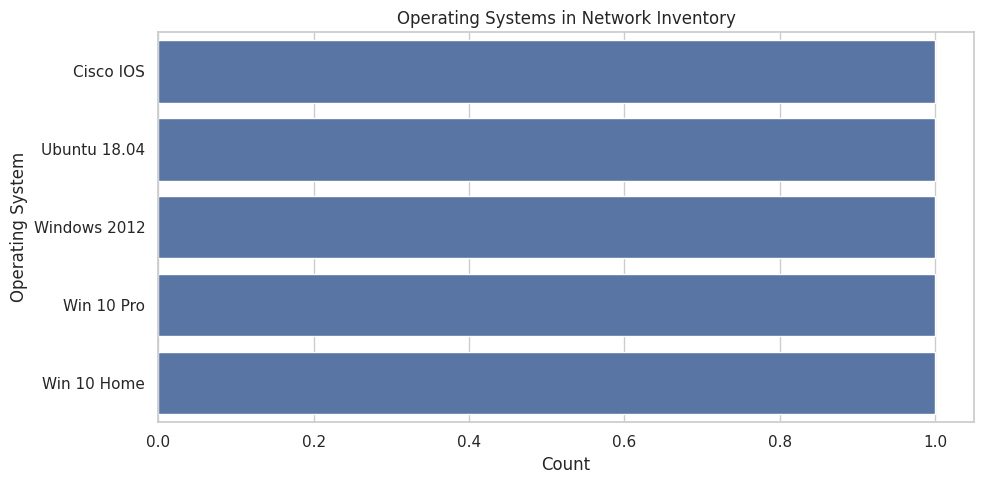


Traffic Log Analysis:


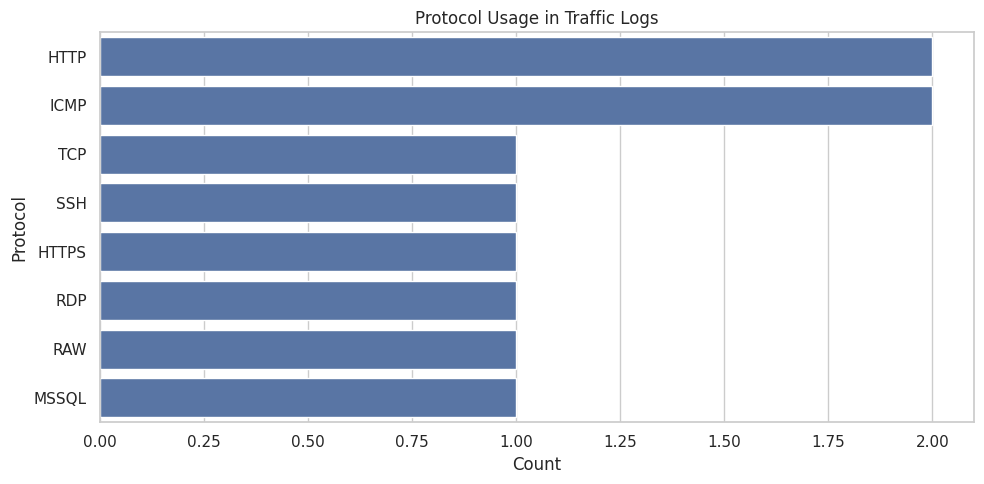

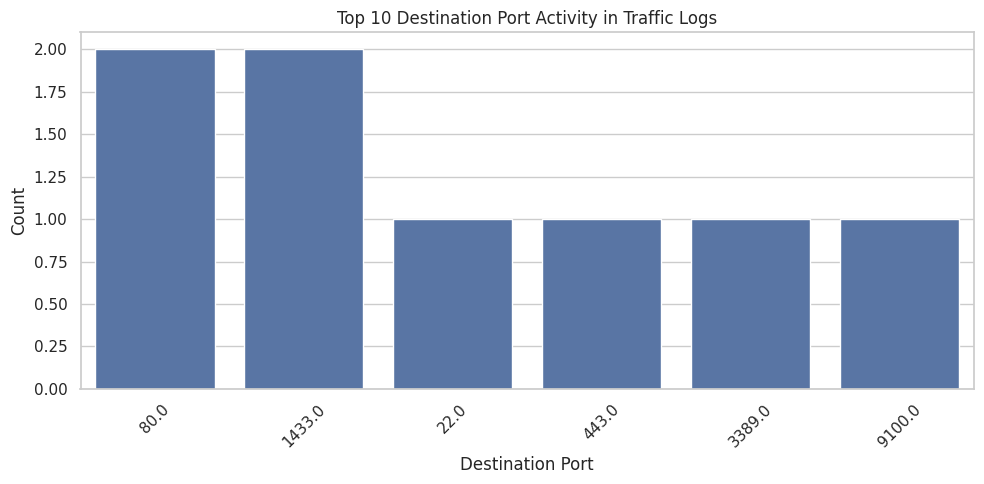


Number of Failed Login Attempts Recorded: 1
             timestamp     src_ip    dst_ip protocol  port       activity  \
3  2023-05-10 08:32:15  10.0.0.15  10.0.0.1      SSH  22.0  Login Attempt   

    result  
3  Failure  


In [ ]:
#  Visualization for Challenge 2

if df_network_inv is not None and df_traffic is not None:
    print("\nNetwork Inventory Summary:")
    print(df_network_inv[['Device', 'Role', 'OS', 'Notes']])

    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_network_inv, y='OS', order=df_network_inv['OS'].value_counts().index)
    plt.title('Operating Systems in Network Inventory')
    plt.xlabel('Count')
    plt.ylabel('Operating System')
    plt.tight_layout()
    plt.show()

    print("\nTraffic Log Analysis:")
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_traffic, y='protocol', order=df_traffic['protocol'].value_counts().index)
    plt.title('Protocol Usage in Traffic Logs')
    plt.xlabel('Count')
    plt.ylabel('Protocol')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    # Filter for common potentially risky ports or protocols shown in logs
    common_ports = df_traffic['port'].value_counts().nlargest(10).index
    sns.countplot(data=df_traffic[df_traffic['port'].isin(common_ports)], x='port', order=common_ports)
    plt.title('Top 10 Destination Port Activity in Traffic Logs')
    plt.xlabel('Destination Port')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    failed_logins = df_traffic[df_traffic['result'] == 'Failure']
    print(f"\nNumber of Failed Login Attempts Recorded: {len(failed_logins)}")
    if not failed_logins.empty:
        print(failed_logins)

else:
    print("Network inventory or traffic logs not loaded, skipping Challenge 2 visualization.")


##My  Current  Assessment: Challenge 3 - Harnessing Big Data

**Focus:** Data availability, real-time insights, predictive capabilities, marketing data integration.
**Data:** `marketing_summary.csv`, `trend_report.csv`, `event_logs.csv`
**Stakeholder:** CMO Jennifer Lee

**Initial Findings:**

*   **Lack of Real-Time Data:** `marketing_summary.csv` shows reports generated daily at 4 PM. `trend_report.csv` is weekly. This directly confirms the CMO's pain point about delayed decisions.
*   **Fragmented Data:** Both `marketing_summary.csv` and `event_logs.csv` have numerous unnamed columns (`col_x`), suggesting poor data structure, potential data dumping, or integration issues that need cleaning and structuring before analysis or ML.
*   **Basic Reporting:** `trend_report.csv` provides weekly averages and simple 'Rising'/'Falling'/'Stable' indicators, lacking the depth needed for predictive forecasting or triggering automated campaigns.
*   **Rich Raw Data Available:** `event_logs.csv` contains valuable granular user interactions (logins, views, searches, wishlist, cart, checkout, profile updates) which *can* be used for the desired AI/ML models and real-time dashboards, but it needs processing.

**Overall:** The current data reporting structure is inadequate for the CMO's needs. While raw event data exists, the infrastructure to process, analyze, and visualize it in real-time or use it for predictive modeling is missing.


Marketing Summary Trends:


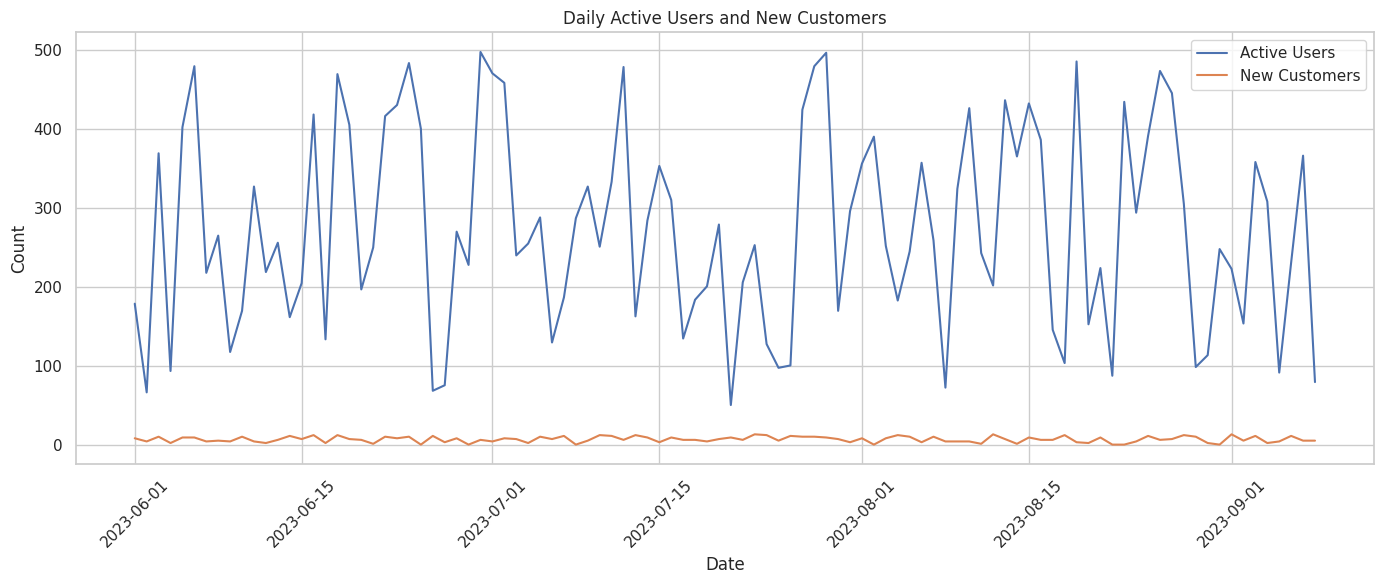

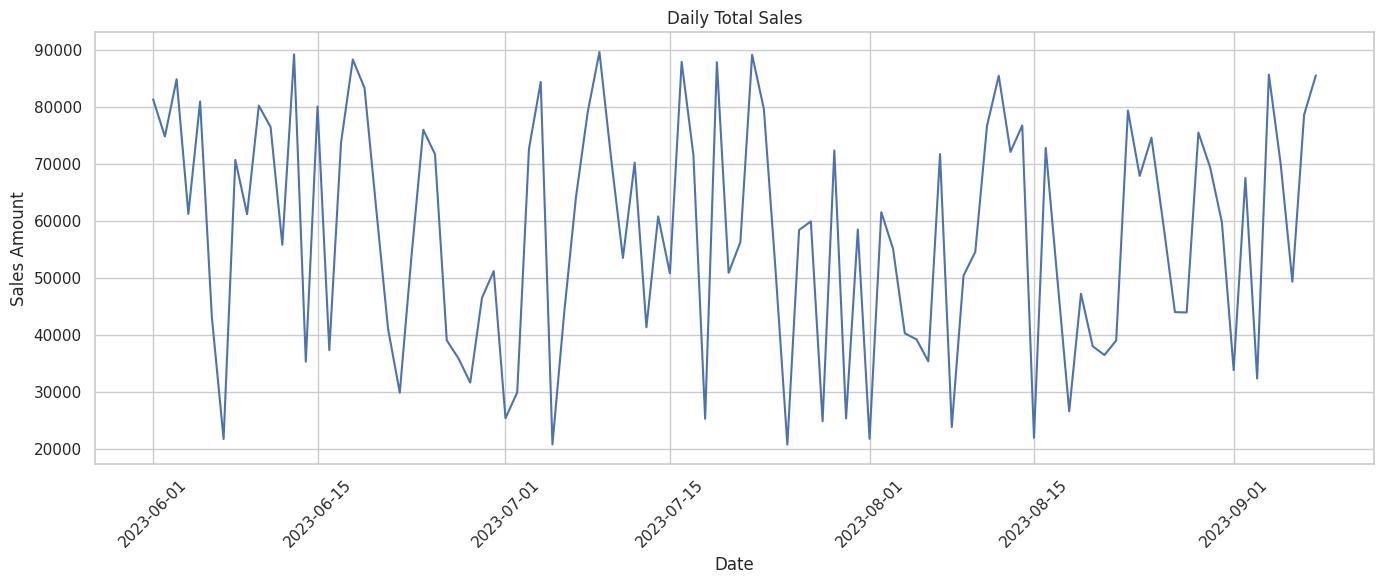


Weekly Trend Report Data:


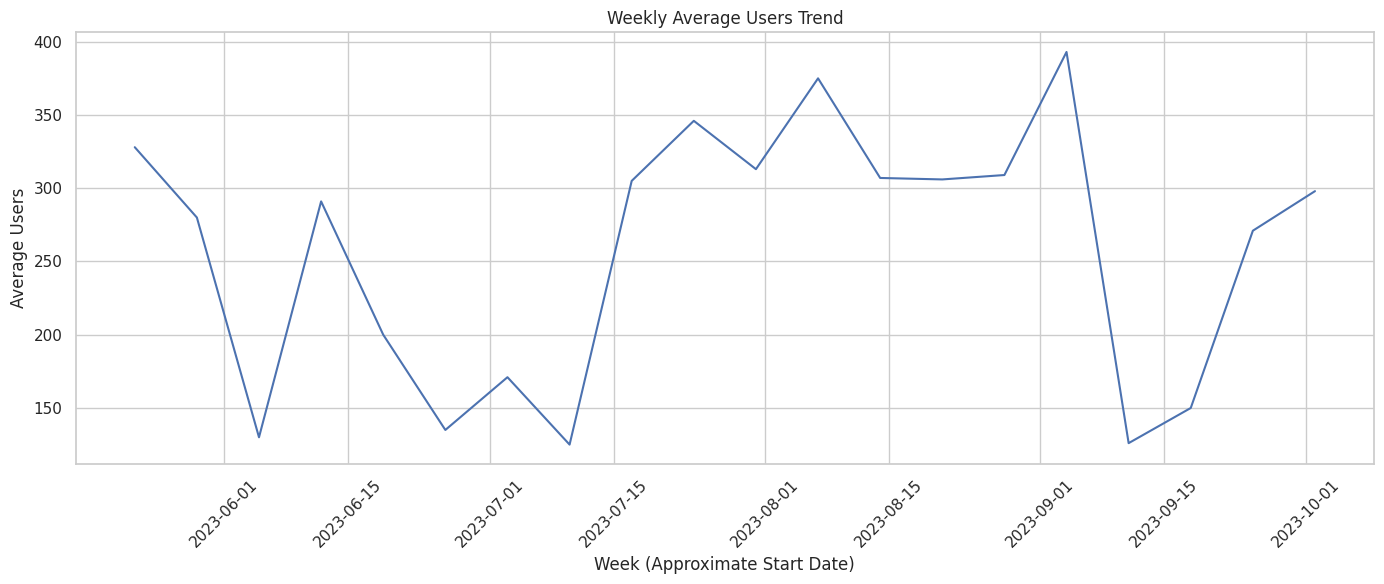

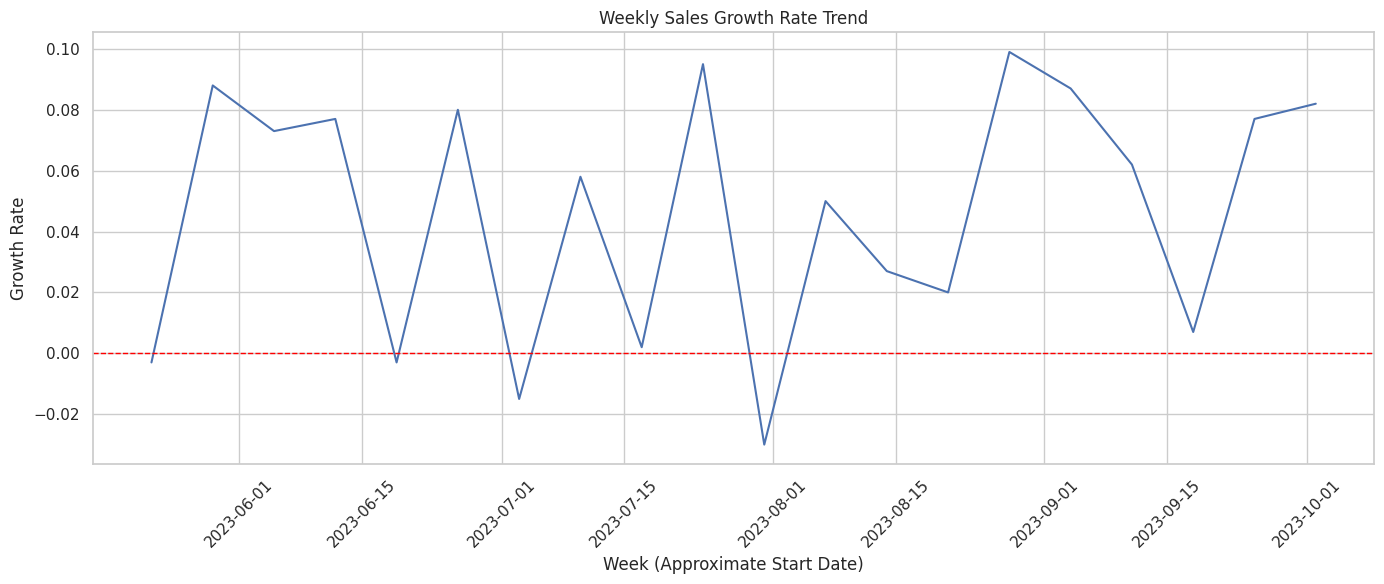


Event Log Analysis:


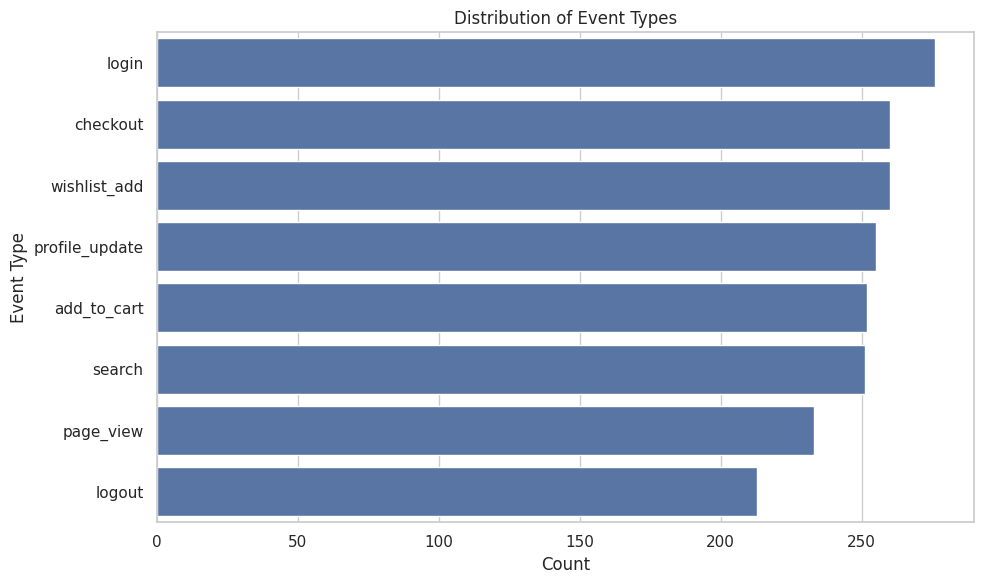

In [ ]:
# Visualization for Challenge 3

if df_marketing is not None and df_trends is not None and df_events is not None:

    # --- Marketing Summary Visualization ---
    print("\nMarketing Summary Trends:")
    # Convert date columns to datetime
    df_marketing['date'] = pd.to_datetime(df_marketing['date'])
    df_marketing['report_generated'] = pd.to_datetime(df_marketing['report_generated'])

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_marketing, x='date', y='users_active', label='Active Users')
    sns.lineplot(data=df_marketing, x='date', y='new_customers', label='New Customers')
    plt.title('Daily Active Users and New Customers')
    plt.ylabel('Count')
    plt.xlabel('Date')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_marketing, x='date', y='total_sales')
    plt.title('Daily Total Sales')
    plt.ylabel('Sales Amount')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # --- Trend Report Visualization ---
    print("\nWeekly Trend Report Data:")
    # Clean week column for plotting if necessary (assuming 'YYYY-Www' format)
    try:
       df_trends['week_dt'] = pd.to_datetime(df_trends['week'].astype(str) + '-1', format='%Y-W%W-%w') # Assuming week starts Monday
    except Exception as e:
       print(f"Could not parse week directly, plotting by index. Error: {e}")
       df_trends['week_dt'] = df_trends.index # Fallback

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_trends, x='week_dt', y='avg_users')
    plt.title('Weekly Average Users Trend')
    plt.ylabel('Average Users')
    plt.xlabel('Week (Approximate Start Date)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_trends, x='week_dt', y='sales_growth_rate')
    plt.title('Weekly Sales Growth Rate Trend')
    plt.ylabel('Growth Rate')
    plt.xlabel('Week (Approximate Start Date)')
    plt.axhline(0, color='red', linestyle='--', lw=1) # Add zero line for reference
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    # --- Event Logs Visualization ---
    print("\nEvent Log Analysis:")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_events, y='event_type', order=df_events['event_type'].value_counts().index)
    plt.title('Distribution of Event Types')
    plt.xlabel('Count')
    plt.ylabel('Event Type')
    plt.tight_layout()
    plt.show()

else:
    print("Marketing, trends, or event logs not loaded, skipping Challenge 3 visualization.")

# High-Level Project Walkthrough Outline

## Project Finer FinMark: High-Level Walkthrough Outline

This outline provides a potential phasing for the 12-week project, addressing the three core challenges simultaneously where appropriate. Team Leads for each milestone will coordinate tasks.

**Phase 1: Discovery & Planning (Weeks 1-2)**

*   **All Teams:**
    *   Deep dive into current state assessment data (this notebook).
    *   Review FinMark IT Manual, relevant compliance (PDPA, GDPR, PCI DSS).
    *   Detailed requirements gathering sessions with stakeholders (COO, CEO, CMO).
    *   Define detailed technical requirements, scope boundaries, and Key Performance Indicators (KPIs) for each challenge.
    *   Technology stack evaluation and selection (Cloud provider, DBs, frameworks, security tools, analytics platforms).
    *   Develop detailed architecture blueprints (App, Network, Data Pipeline).
    *   Establish detailed project plan, task breakdown, and resource allocation (using Project Management Tool).
*   **Output:** Milestone 1: Project Blueprint (Detailed Architecture, Network Diagram, Data Pipeline Design, Tech Stack, KPIs, Plan).

**Phase 2: Prototyping & Foundation Building (Weeks 3-7)**

*   **Software Team:**
    *   Develop core application modules (focus on scalable architecture).
    *   Build functional prototype of the new high-performance dashboard.
    *   Implement core authentication/authorization based on network team's design.
*   **Network Team:**
    *   Design and simulate the secure, scalable network infrastructure (using tools like Cisco Packet Tracer).
    *   Configure core security components (firewalls, IAM, initial VPN setup).
    *   Develop security policies and RBAC model in detail.
    *   Simulate network performance under projected load.
*   **Data Team:**
    *   Design and build prototype data pipeline (ETL/ELT processes).
    *   Cleanse and structure key datasets (`event_logs`, `marketing_summary`).
    *   Develop initial real-time dashboard prototype (integrating data sources).
    *   Explore initial predictive models based on historical data.
*   **Output:** Milestone 2: Refined Project Prototype (Functional App Proto, Working Network Sim, Functional Data Pipeline/Analysis Proto).

**Phase 3: Development, Integration & Testing (Weeks 8-11)**

*   **All Teams:**
    *   Intensive development based on prototypes and blueprints.
    *   **Integration:** Crucial phase ensuring App, Network, and Data components work together seamlessly.
    *   Rigorous testing:
        *   *Software:* Unit, integration, performance, load, security testing.
        *   *Network:* Penetration testing, vulnerability scanning, failover testing, performance testing.
        *   *Data:* Data validation, pipeline stress testing, model accuracy testing, dashboard performance testing.
    *   Refine based on testing feedback.
    *   Develop deployment and rollback plans.
    *   Prepare documentation.

**Phase 4: Final Refinement & Project Pitch Prep (Week 12)**

*   **All Teams:**
    *   Final bug fixing and performance tuning based on comprehensive testing.
    *   Finalize all documentation (User guides, technical docs, security policies).
    *   Prepare final project pitch materials demonstrating how the new platform meets the defined goals and KPIs for the CTO.
*   **Output:** Terminal Assessment: Project Final Pitch (Refined solution, demo, documentation, performance metrics vs. KPIs).

---

*This is a high-level outline and specific tasks within each phase will be detailed and managed using the team's Project Management Tool.*

#  Next Steps & Conclusion

## Next Steps (Immediate for Week 1/2)

1.  **Team Formation & Roles:** Confirm team members and assign leads/roles for Milestone 1.
2.  **Project Management Tool Setup:** Populate the tool with initial tasks based on this outline and the brief. Secure deadlines.
3.  **Deep Dive & Questions:** Individually and as a team, perform a deeper analysis of the provided data and documents. Formulate specific questions for clarification (e.g., on missing IT Manual provisions, data column definitions, specific stakeholder priorities).
4.  **Initial Consulting Report Draft:** Begin drafting the report outlining strategy, recommended technologies, and initial findings (as per Week 1 materials).
5.  **Schedule Stakeholder Follow-ups (Simulated):** Plan for (simulated) follow-up meetings with COO, CEO, CMO to refine requirements based on this initial assessment.

## Conclusion

This initial assessment confirms the challenges outlined in the Project Finer FinMark brief. The current application, network, and data infrastructure are demonstrably insufficient for FinMark's growth ambitions and operational needs. Significant limitations exist in scalability, security, and real-time data utilization.

The provided data gives a solid baseline to build upon. The next crucial steps involve detailed requirement gathering, architectural design, and technology selection to ensure the final platform is truly **scalable, secure, and data-driven**, meeting the distinct needs of the COO, CEO, and CMO, and ultimately serving the CTO's vision.